# Obesity Level Classification Using Physical Condition and Eating Habits

Setup

In [2]:
# Run this before continuing
library(tidyverse)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



The Obesity Data Set

In [3]:
obesity <- read_csv("data/ObesityDataSet.csv")
obesity <- obesity %>%
            mutate(NObeyesdad = as_factor(NObeyesdad))
obesity

Parsed with column specification:
cols(
  Gender = col_character(),
  Age = col_double(),
  Height = col_double(),
  Weight = col_double(),
  family_history_with_overweight = col_character(),
  FAVC = col_character(),
  FCVC = col_double(),
  NCP = col_double(),
  CAEC = col_character(),
  SMOKE = col_character(),
  CH2O = col_double(),
  SCC = col_character(),
  FAF = col_double(),
  TUE = col_double(),
  CALC = col_character(),
  MTRANS = col_character(),
  NObeyesdad = col_character()
)



Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<fct>
Female,21,1.62,64,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
Female,21,1.52,56,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
Male,23,1.80,77,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Female,22.52404,1.752206,133.6894,yes,yes,3,3,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
Female,24.36194,1.739450,133.3466,yes,yes,3,3,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
Female,23.66471,1.738836,133.4726,yes,yes,3,3,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


## Data summary

In [3]:
# code here - Philip
# -Height, -Weight, -Physical Activity (FAF), -High calorie meals (FAVC), -Water intake (CH2O), -Smoke (SCC), >Alcohol (CALC)

obesity_num <- obesity %>%
    select(Height, Weight, FAF, CH2O) %>%
    pivot_longer(cols = Height:CH2O,
                names_to = "Variable",
                values_to = "Stat") %>%
    group_by(Variable) %>%
    summarize(Minimum = min(Stat), Maximum = max(Stat), Mean = mean(Stat), Median = median(Stat), Mode = names(table(Stat))[table(Stat)==max(table(Stat))], Standard_deviation = sd(Stat))

obesity_qual <- obesity %>%
    select(FAVC, SMOKE) %>%
    pivot_longer(cols = FAVC:SMOKE,
                names_to = "Variable",
                values_to = "Stat") %>%
    group_by(Variable) %>%
    table() %>%
    as.data.frame.matrix()

obesity_calc <- obesity %>%
    select(CALC) %>%
    pivot_longer(cols = CALC,
                names_to = "Variable",
                values_to = "Stat") %>%
    group_by(Variable) %>%
    table() %>%
    as.data.frame.matrix() %>%
    rename(Never = no)

`summarise()` ungrouping output (override with `.groups` argument)



### Summary table for height, weight, physical activity (FAF) and water intake (CH2O)

In [4]:
obesity_num

Variable,Minimum,Maximum,Mean,Median,Mode,Standard_deviation
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
CH2O,1.00,3.00,2.008011,2.000000,2,0.61295345
FAF,0.00,3.00,1.010298,1.000000,0,0.85059243
Height,1.45,1.98,1.701677,1.700499,1.7,0.09330482
Weight,39.00,173.00,86.586058,83.000000,80,26.19117175


### Contingency tables for high calorie meal consumption (FAVC), smoking (SCC) and alcohol consumption (CALC)

In [5]:
obesity_qual
obesity_calc

,no,yes
,<int>,<int>
FAVC,245,1866
SMOKE,2067,44


,Always,Frequently,Never,Sometimes
,<int>,<int>,<int>,<int>
CALC,1,70,639,1401


## Data Visualization

In [6]:
options(repr.plot.width = 12)

### Physical activity frequency

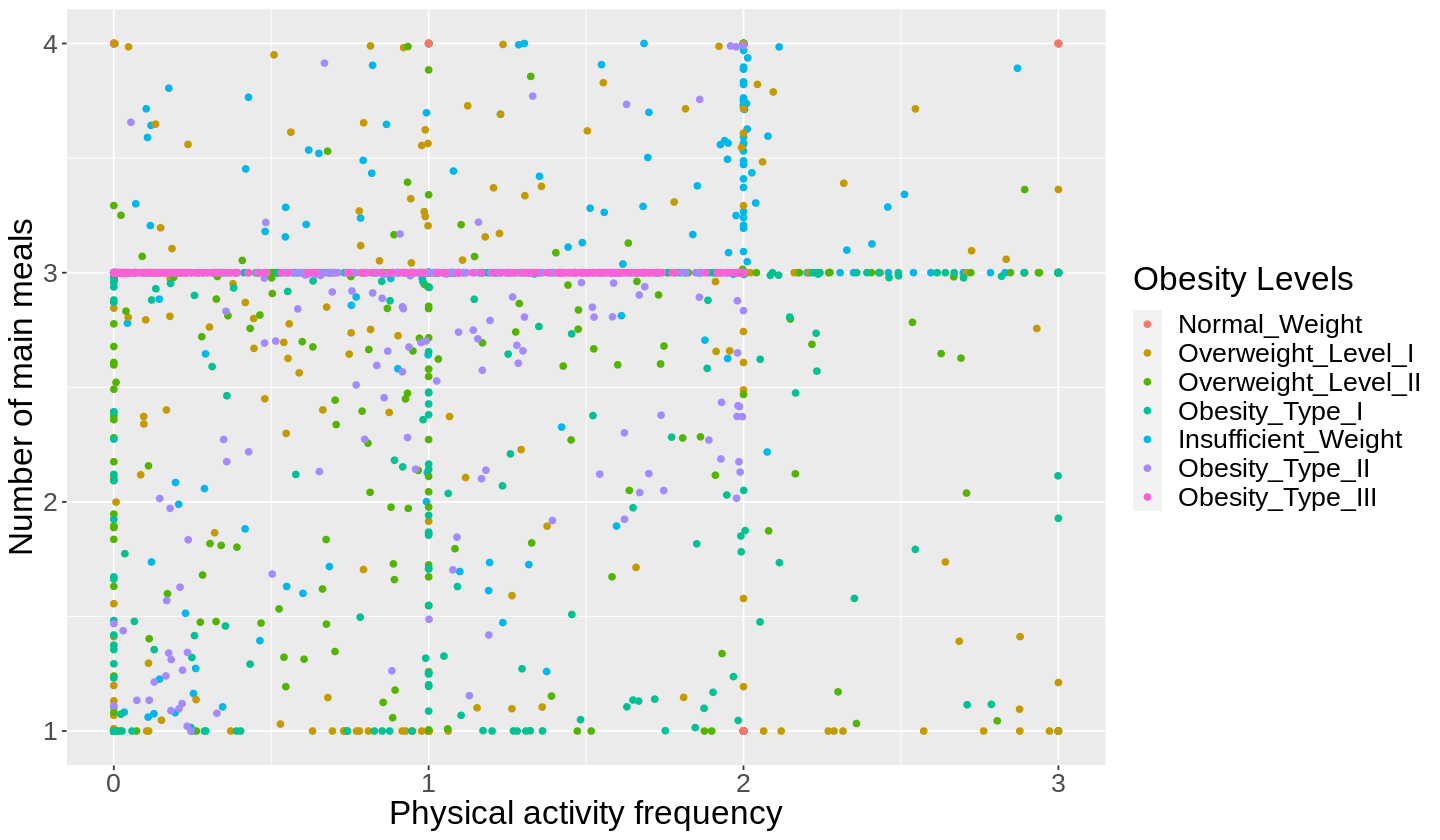

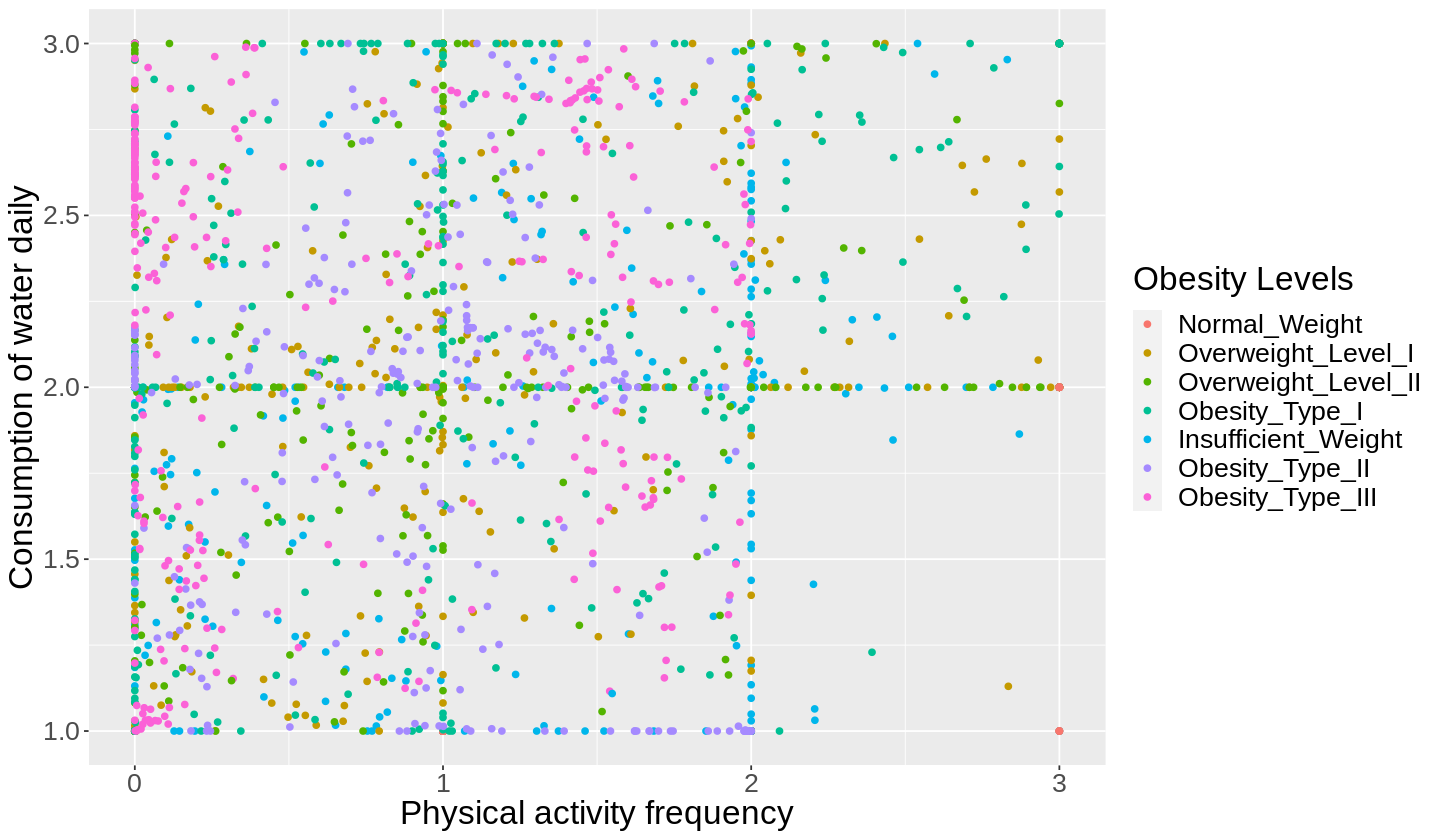

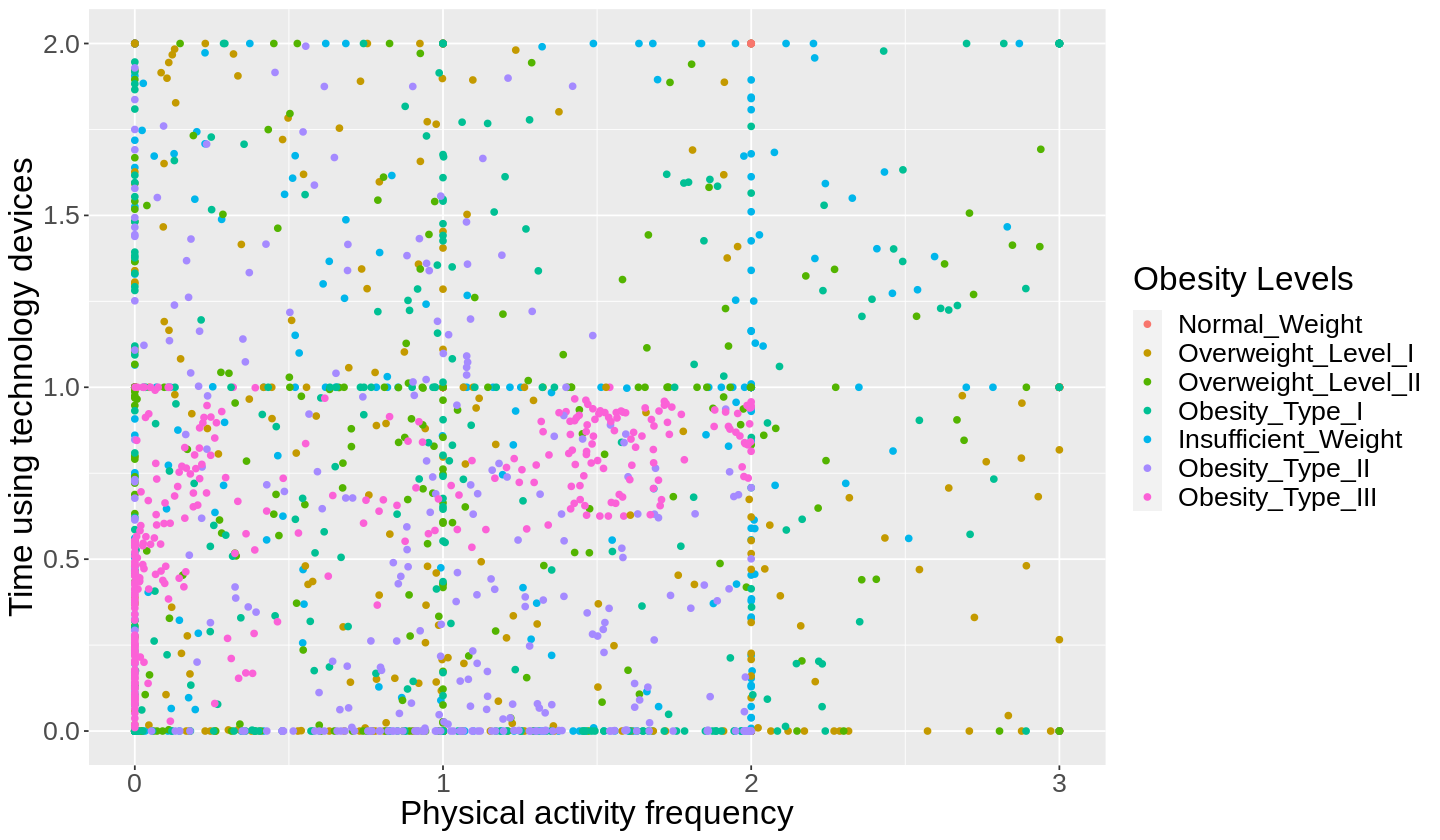

In [7]:
faf_ncp_plot <- obesity %>%
                ggplot(aes(x = FAF, y = NCP, color = NObeyesdad)) +
                    geom_point() +
                    labs(x = "Physical activity frequency", y = "Number of main meals", color = "Obesity Levels") +
                    theme(text = element_text(size = 20))

faf_ch2o_plot <- obesity %>%
                ggplot(aes(x = FAF, y = CH2O, color = NObeyesdad)) +
                    geom_point() +
                    labs(x = "Physical activity frequency", y = "Consumption of water daily", color = "Obesity Levels") +
                    theme(text = element_text(size = 20))

faf_tue_plot <- obesity %>%
                ggplot(aes(x = FAF, y = TUE, color = NObeyesdad)) +
                    geom_point() +
                    labs(x = "Physical activity frequency", y = "Time using technology devices", color = "Obesity Levels") +
                    theme(text = element_text(size = 20))

faf_ncp_plot
faf_ch2o_plot
faf_tue_plot

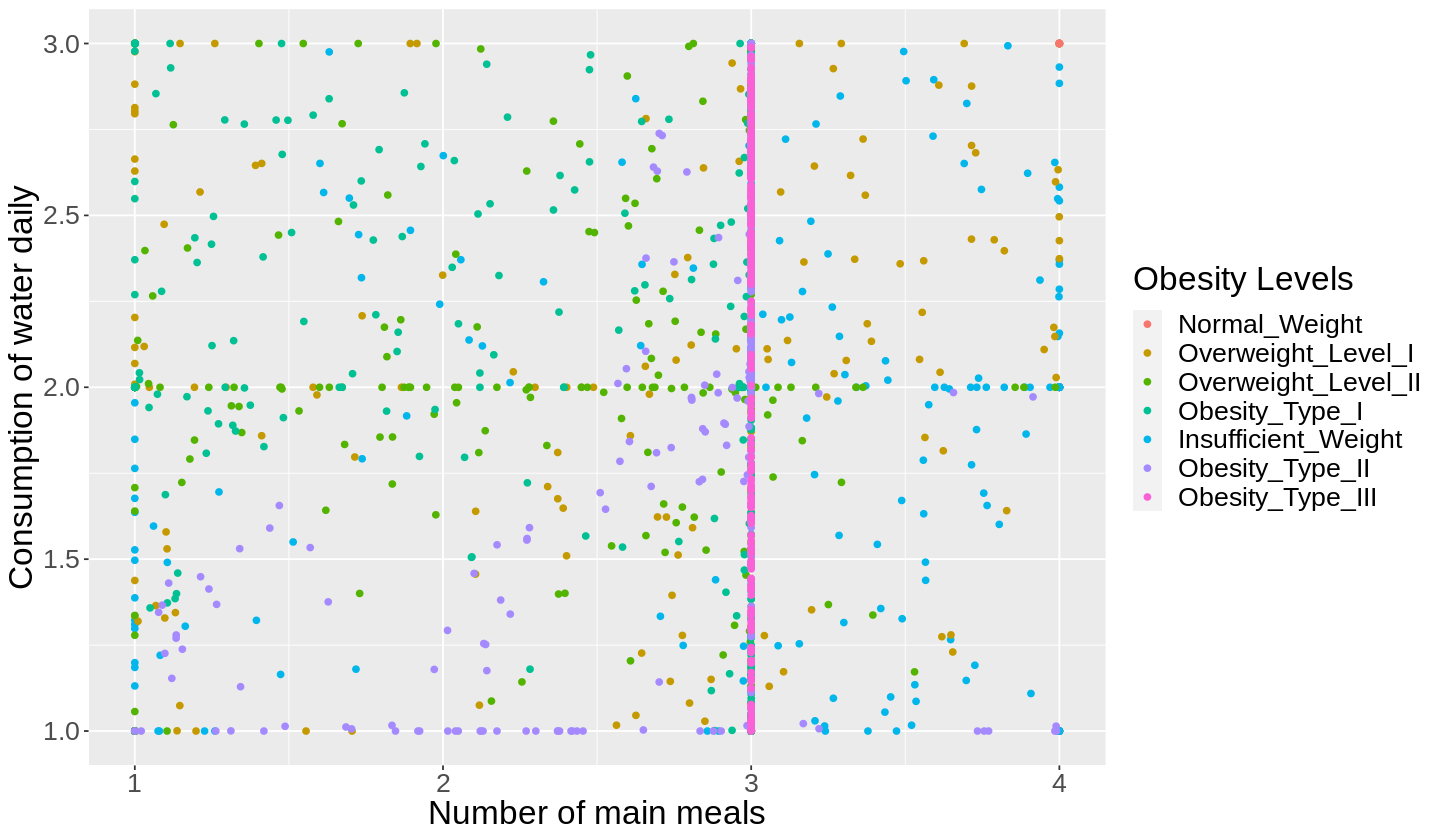

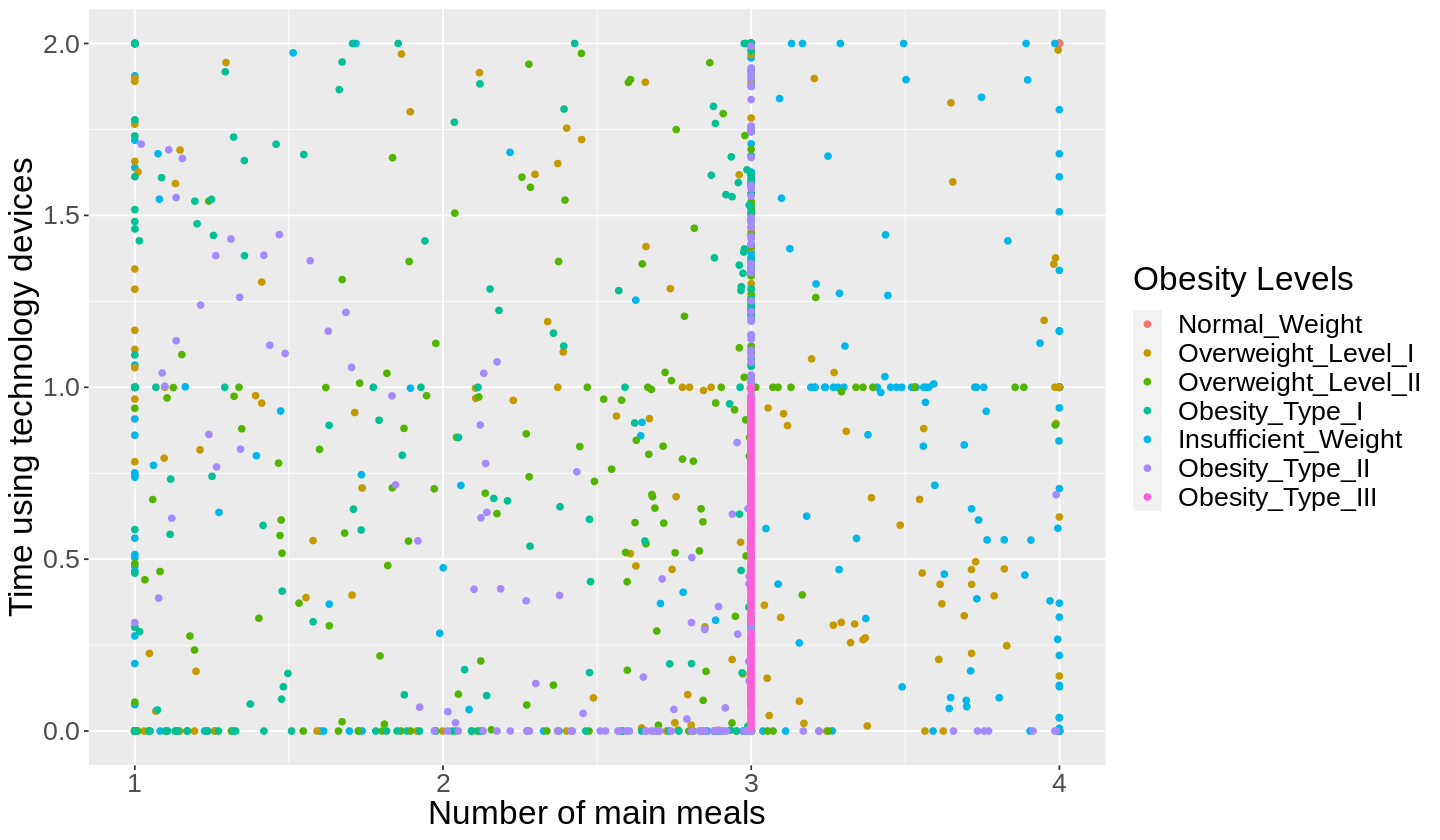

In [8]:
ncp_ch2o_plot <- obesity %>%
                ggplot(aes(x = NCP, y = CH2O, color = NObeyesdad)) +
                    geom_point() +
                    labs(x = "Number of main meals", y = "Consumption of water daily", color = "Obesity Levels") +
                    theme(text = element_text(size = 20))

ncp_tue_plot <- obesity %>%
                ggplot(aes(x = NCP, y = TUE, color = NObeyesdad)) +
                    geom_point() +
                    labs(x = "Number of main meals", y = "Time using technology devices", color = "Obesity Levels") +
                    theme(text = element_text(size = 20))

ncp_ch2o_plot
ncp_tue_plot

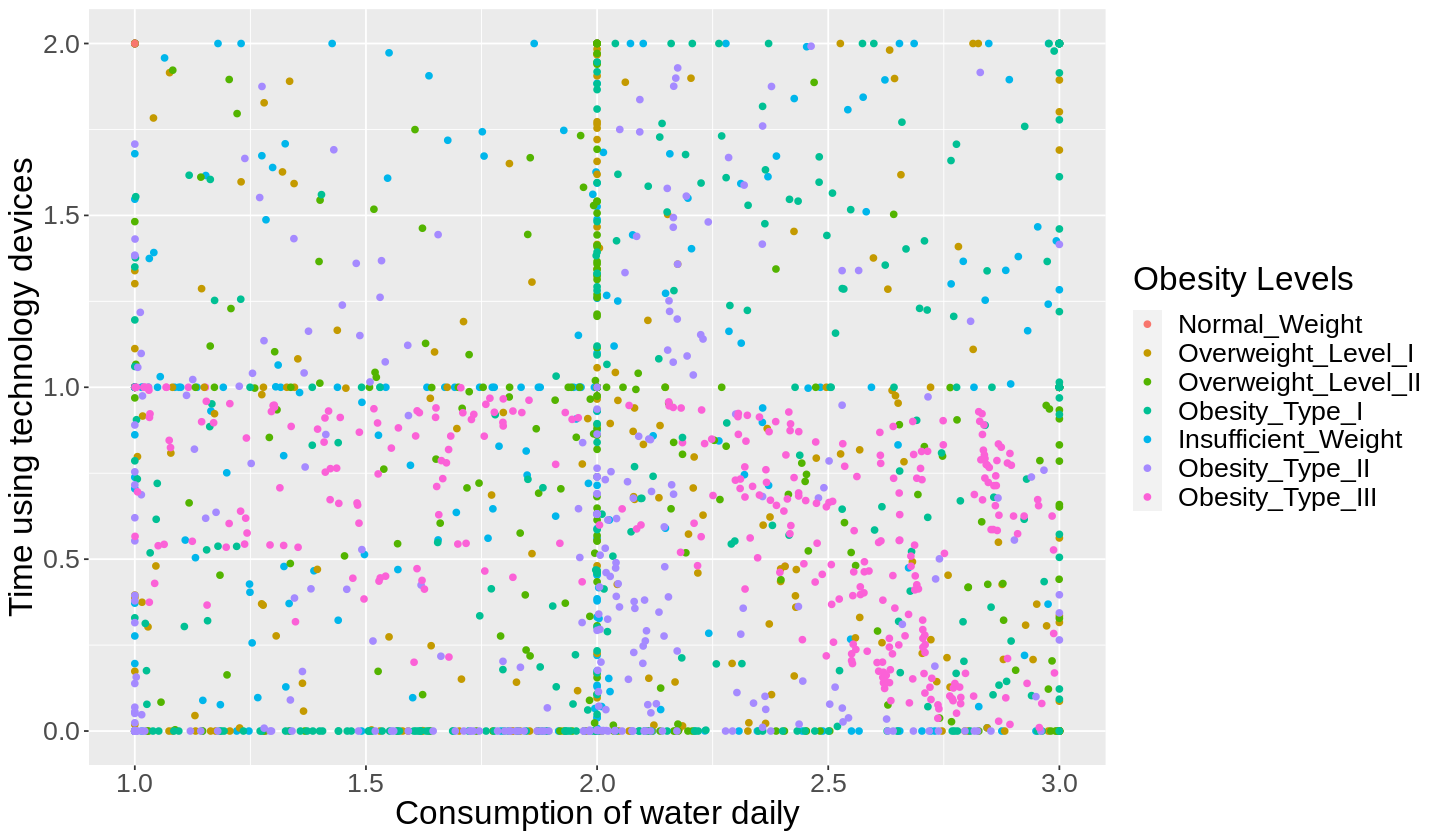

In [9]:
ch2o_tue_plot <- obesity %>%
                ggplot(aes(x = CH2O, y = TUE, color = NObeyesdad)) +
                    geom_point() +
                    labs(x = "Consumption of water daily", y = "Time using technology devices", color = "Obesity Levels") +
                    theme(text = element_text(size = 20))

ch2o_tue_plot

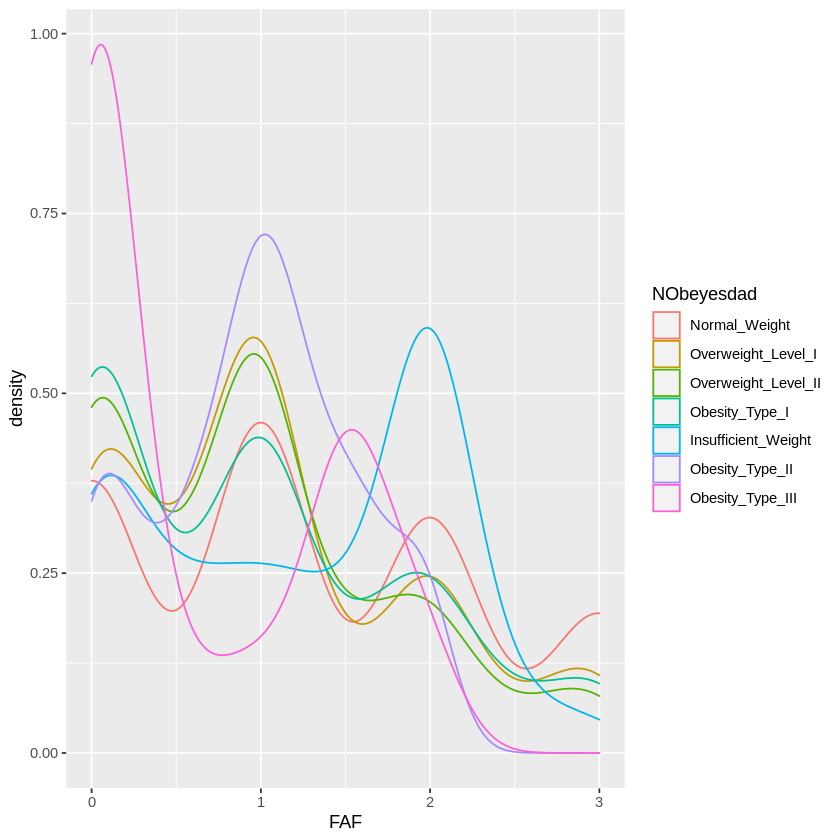

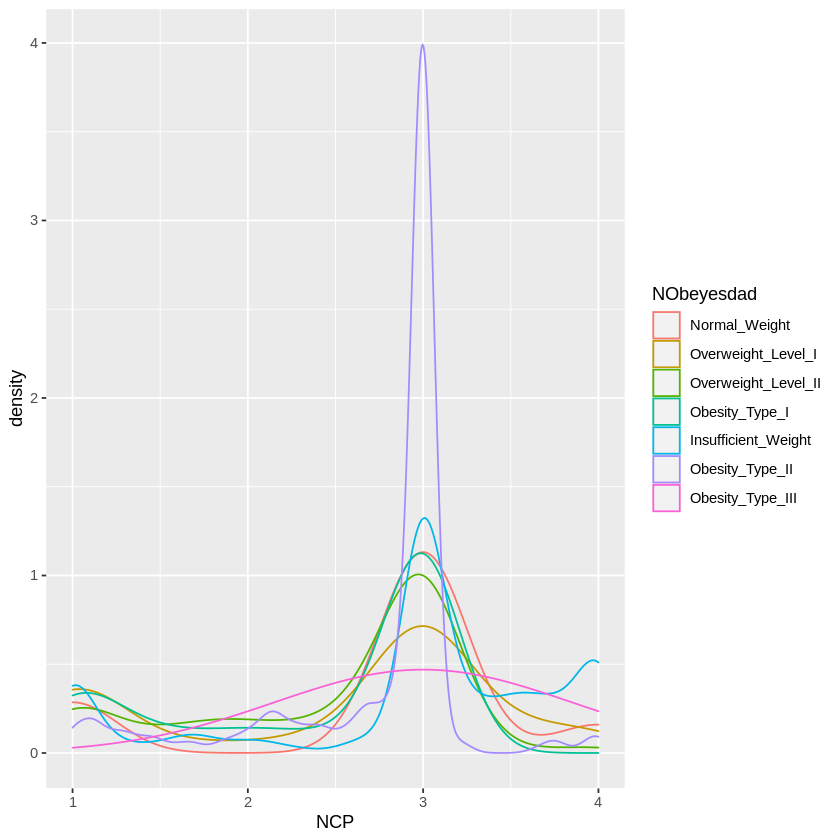

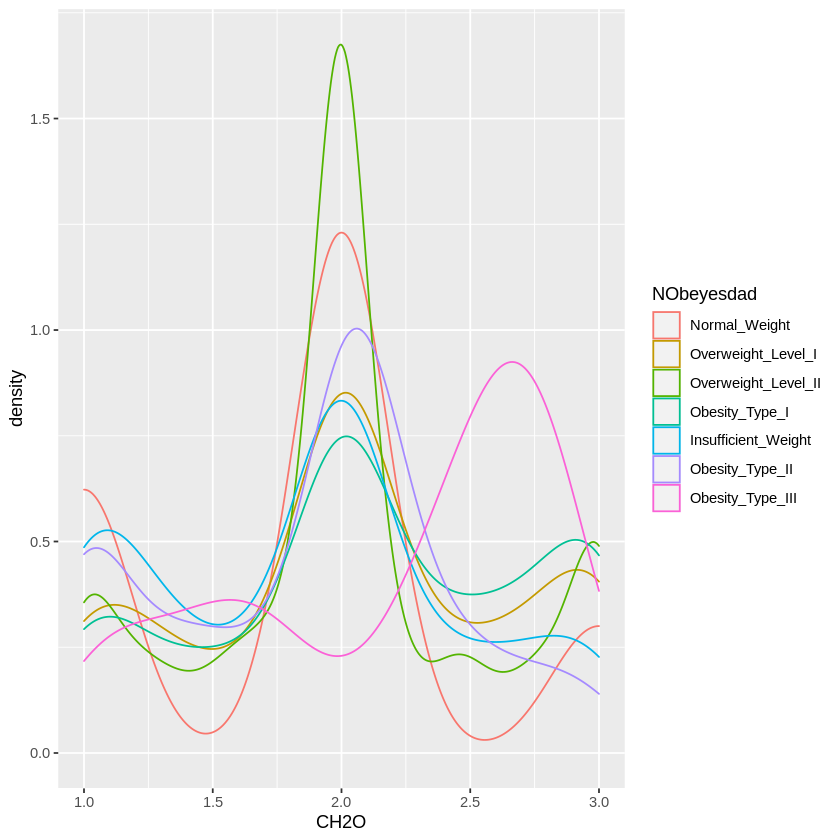

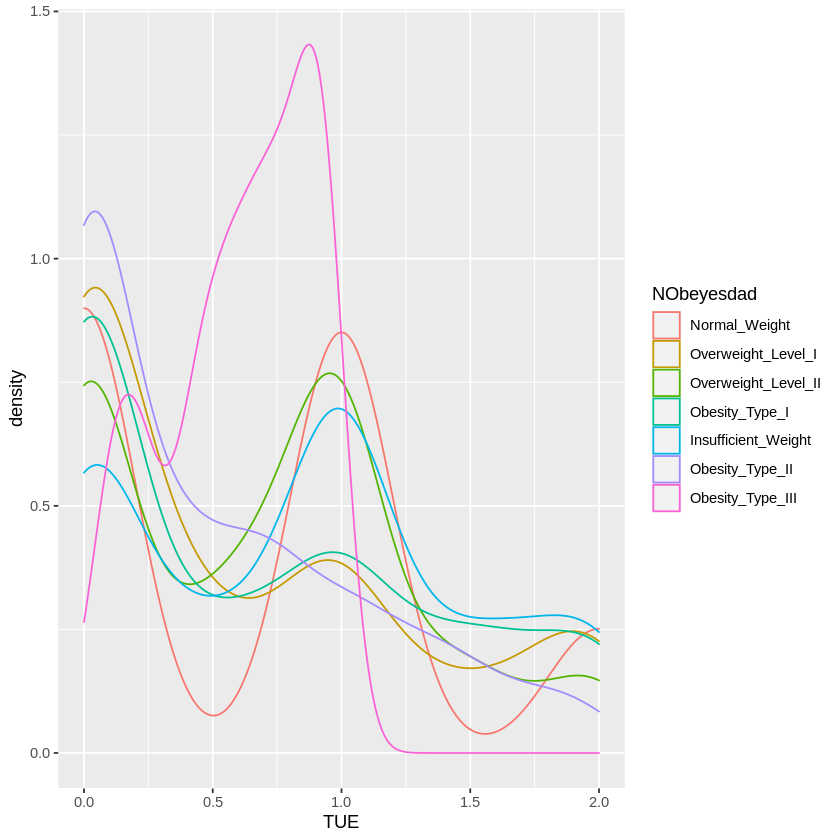

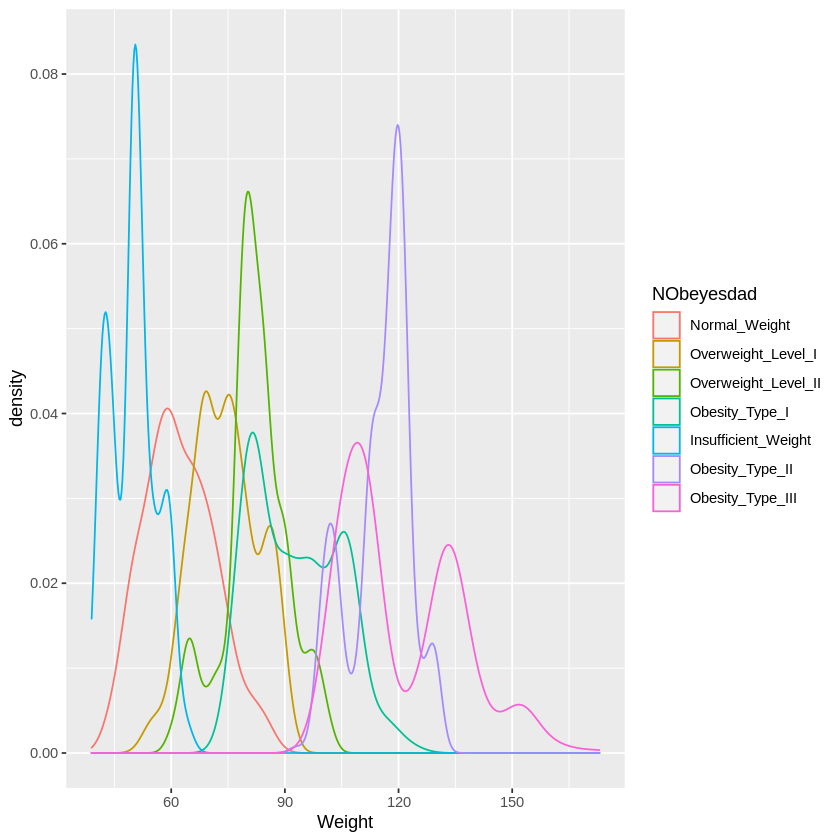

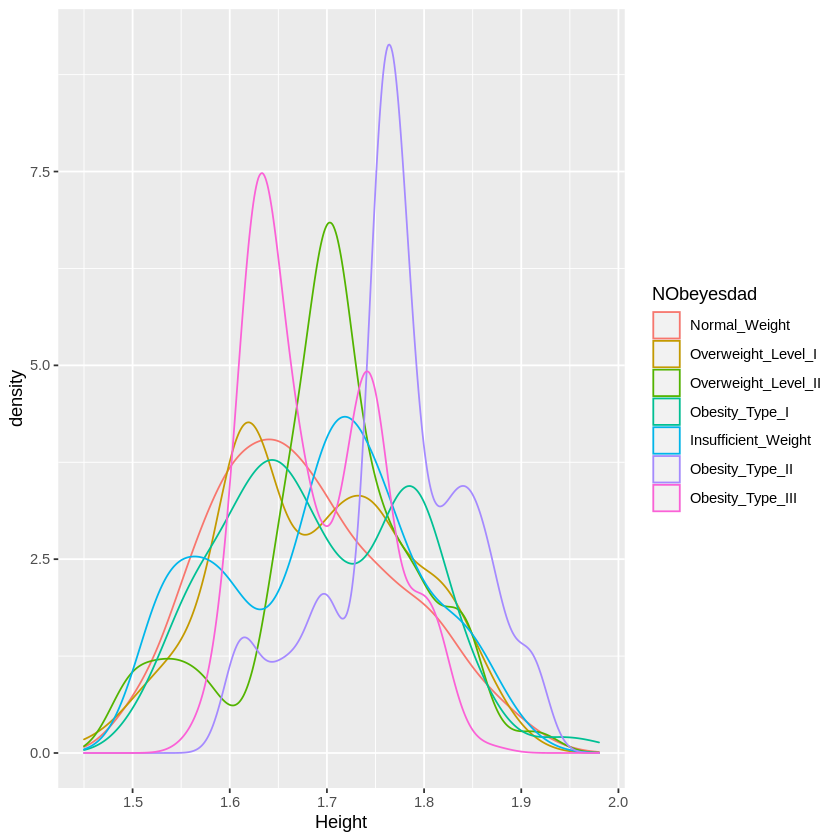

In [4]:
FAF_plot <- ggplot(obesity, aes(x = FAF, colour = NObeyesdad)) +
    geom_density()

NCP_plot <- ggplot(obesity, aes(x = NCP, colour = NObeyesdad)) +
  geom_density()

CH2O_plot <- ggplot(obesity, aes(x = CH2O, colour = NObeyesdad)) +
  geom_density()

TUE_plot <- ggplot(obesity, aes(x = TUE, colour = NObeyesdad)) +
  geom_density()

weight_plot <- ggplot(obesity, aes(x = Weight, colour = NObeyesdad))+
  geom_density()

height_plot <- ggplot(obesity, aes(x = Height, colour = NObeyesdad))+
  geom_density()

FAF_plot
NCP_plot
CH2O_plot
TUE_plot
weight_plot
height_plot